In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,KFold,cross_validate

from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox
from scipy import stats as scipy_stats

In [2]:
df_300 = pd.read_csv('E:\\python\\2.PROJECTS\\car sales prediction\\data\\car data.csv')
df_4000 = pd.read_csv('E:\\python\\2.PROJECTS\\car sales prediction\\data\\CAR DETAILS FROM CAR DEKHO.csv')
df_8000 = pd.read_csv('E:\\python\\2.PROJECTS\\car sales prediction\\data\\Car details v3.csv')
df_2000  =pd.read_csv('E:\\python\\2.PROJECTS\\car sales prediction\\data\\car details v4.csv')


In [3]:
df_300.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_2000.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df_4000.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df_8000.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df = df_300.copy()

In [8]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe(include='number')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [12]:
df['Car_Name'].nunique()

98

In [13]:
df.drop('Car_Name', axis=1, inplace=True)

In [14]:
df["Year"].max()

2018

In [308]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)

In [309]:
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [310]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  # num
                              df.select_dtypes(include='object').columns.values]) # cat
OrderedCols
#1st 5 nums rest cat

array(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type', 'Seller_Type', 'Transmission'], dtype=object)

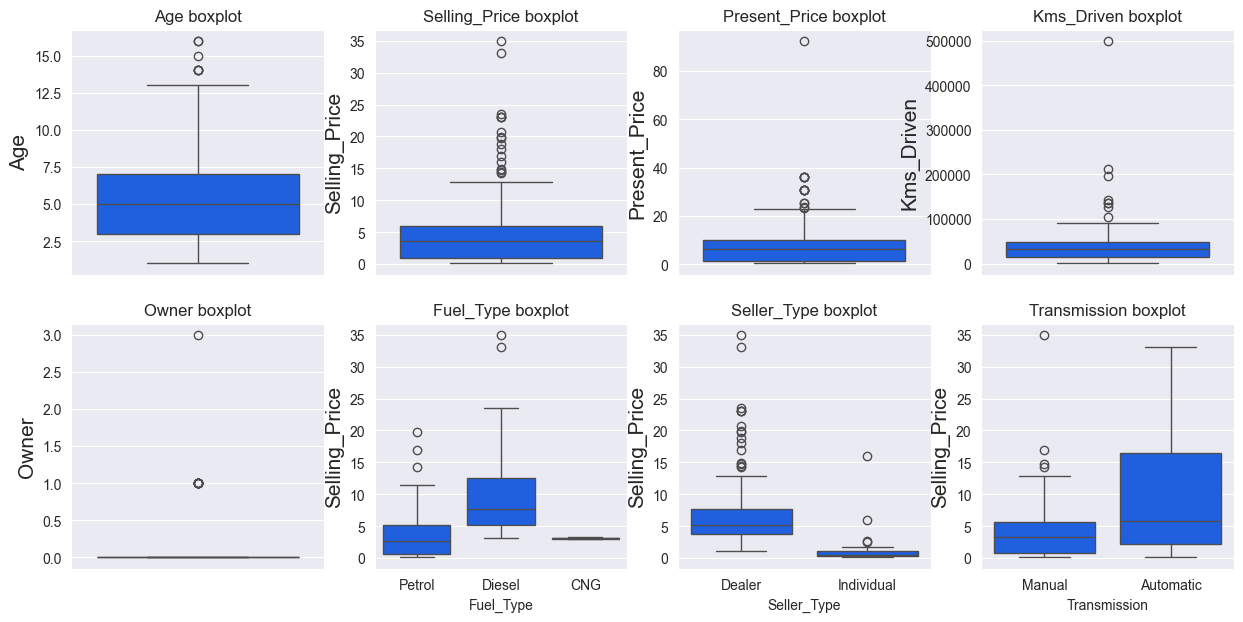

In [311]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

_,ax = plt.subplots(nrows=2,ncols=4,figsize=(15,7))

for idx,col in enumerate(OrderedCols):
    r = idx//4
    c = idx %4
    if idx<5:
        sns.boxplot(data=df,y=col,ax=ax[r][c])
        ax[r][c].set_title(f"{col} boxplot")
        ax[r][c].yaxis.label.set_size(15)
    else :
        sns.boxplot(data=df,y='Selling_Price',x=col,ax=ax[r][c])
        ax[r][c].set_title(f"{col} boxplot")
        ax[r][c].yaxis.label.set_size(15)

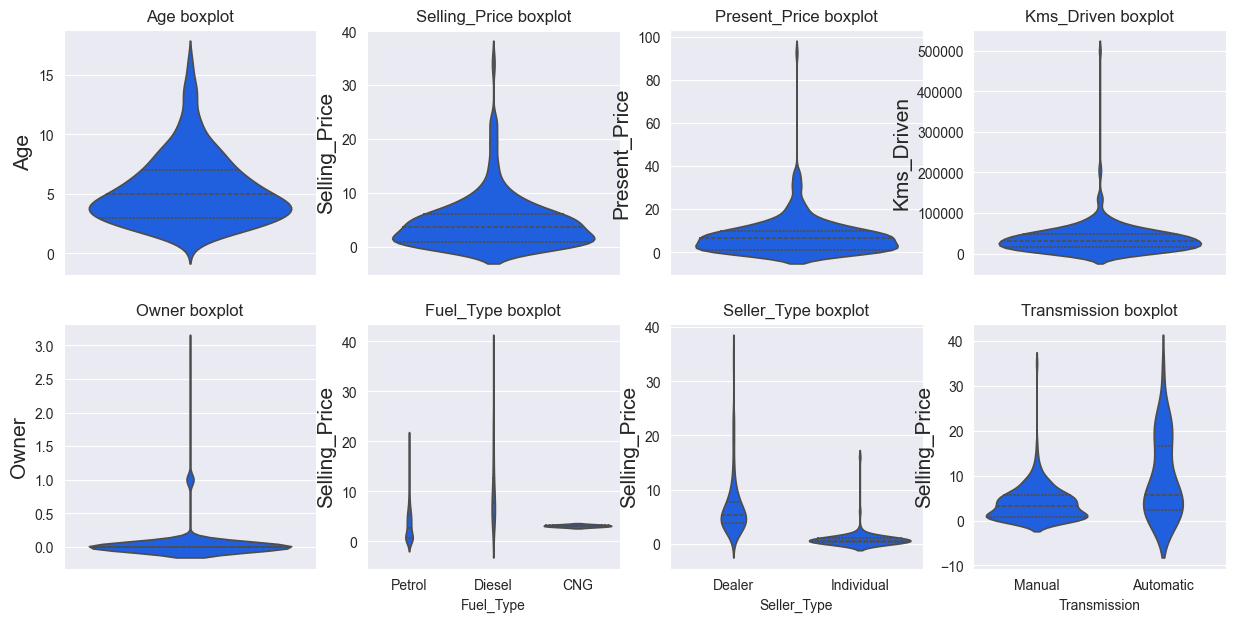

In [312]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

_,ax = plt.subplots(nrows=2,ncols=4,figsize=(15,7))

for idx,col in enumerate(OrderedCols):
    r = idx//4
    c = idx %4
    if idx<5:
        sns.violinplot(data= df,y=col,inner='quartile',ax=ax[r][c])
        ax[r][c].set_title(f"{col} boxplot")
        ax[r][c].yaxis.label.set_size(15)
    else :
        sns.violinplot(data= df,y='Selling_Price',x=col,inner='quartile',ax=ax[r][c])
        ax[r][c].set_title(f"{col} boxplot")
        ax[r][c].yaxis.label.set_size(15)

In [313]:
outliers_indexes = []
iqr_range ={}
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        iqr_range[col] = maximum,minimum
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]

        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    iqr_range[col] = maximum,minimum
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes)) # used set to remove duplicates
print(f'{len(outliers_indexes)} outliers:\n{outliers_indexes}')

38 outliers:
[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


In [314]:
iqr_range

{'Fuel_Type': (3.399999999999999, 2.800000000000001),
 'Seller_Type': (2.02375, -0.6062500000000001),
 'Transmission': (37.875, -19.125),
 'Age': (13.0, -3.0),
 'Selling_Price': (13.649999999999999, -6.749999999999999),
 'Present_Price': (22.950000000000003, -11.850000000000001),
 'Kms_Driven': (99417.5, -35650.5),
 'Owner': (0.0, 0.0)}

In [315]:
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

target = 'Selling_Price'
# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
removing_indexes.extend(df1[df1['Present_Price']>80].index)
df1.loc[removing_indexes,'label'] = 'Removing'

df1.label.unique()

array(['Normal', 'Outlier', 'Removing'], dtype=object)

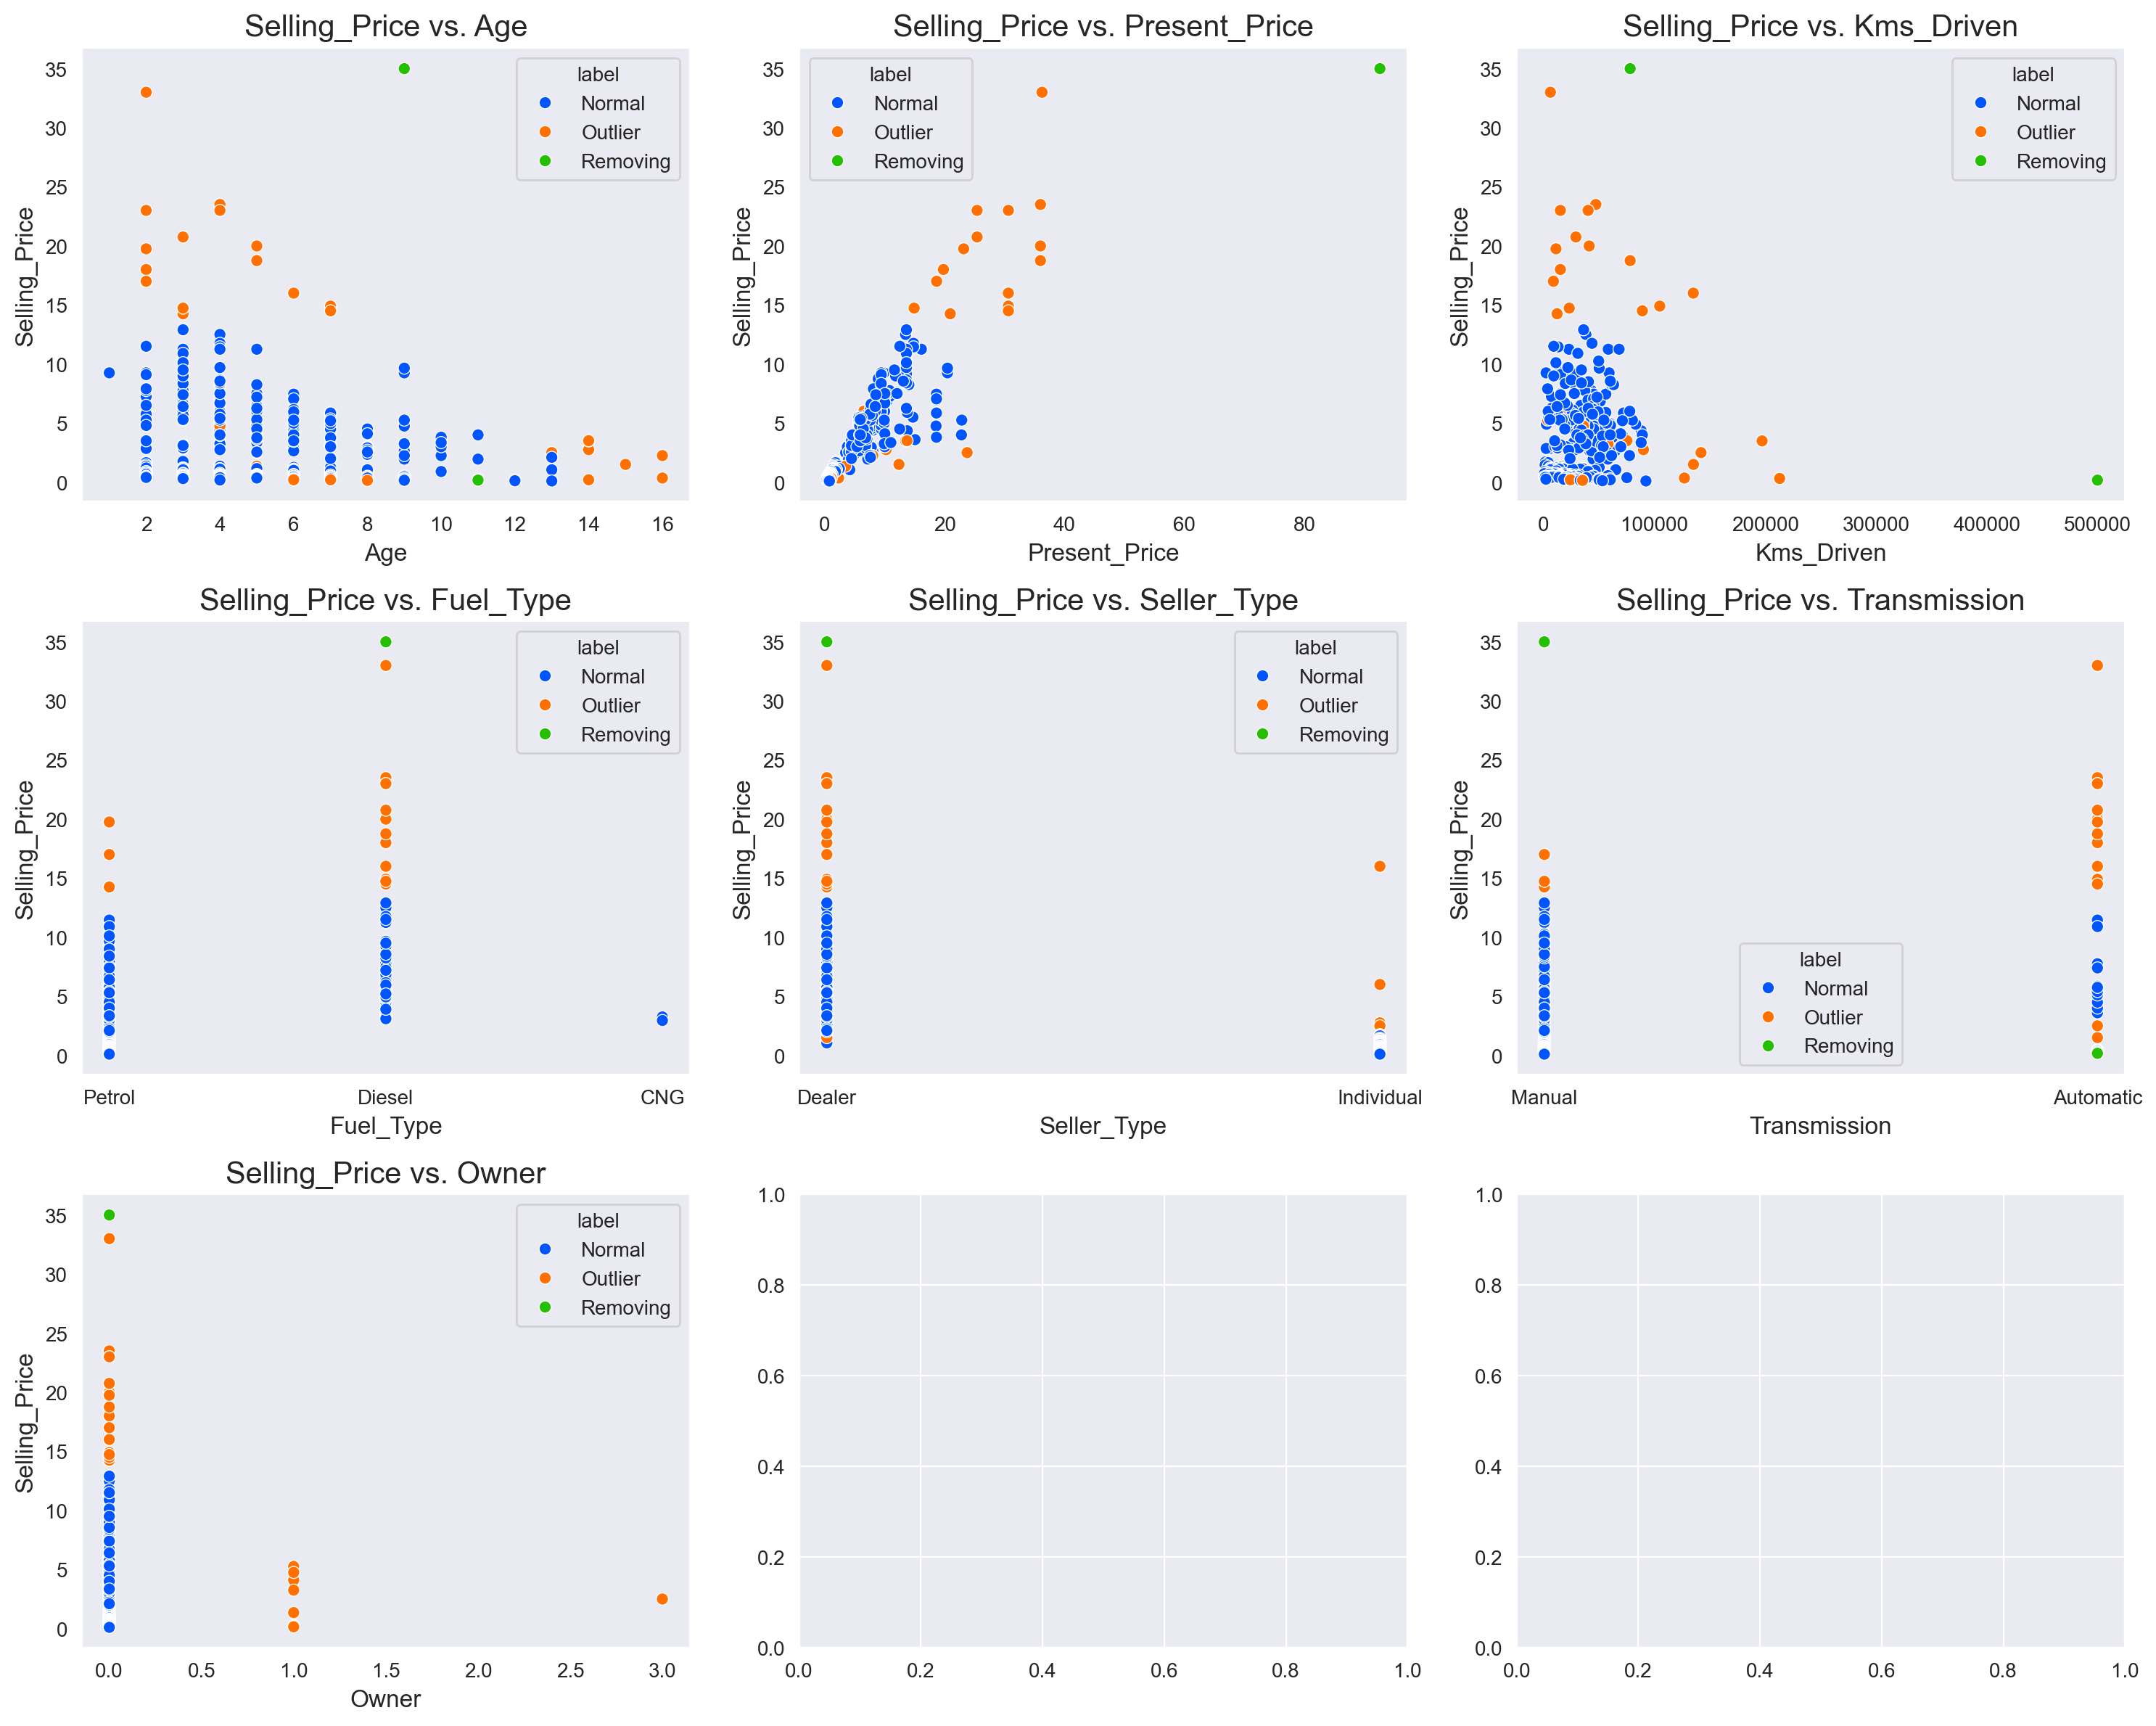

In [316]:

target = 'Selling_Price'
features = df.columns.drop(target)
# colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    r=i//3
    c=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[r][c])
    ax[r][c].set_title(f'{target} vs. {features[i]}', size = 15)
    ax[r][c].set_xlabel(features[i], size = 12)
    ax[r][c].set_ylabel(target, size = 12)
    ax[r][c].grid()

plt.tight_layout()
plt.show()

In [317]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [318]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [319]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [320]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


__wont drop some cars have same features__

# ENCODING

In [321]:
cat_cols= df.select_dtypes(exclude=['int64', 'float64']).columns.to_list()

df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)
df1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


In [322]:
df1.drop(target,axis=1)

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,5.59,27000,0,False,True,False,True
1,6,9.54,43000,0,True,False,False,True
2,2,9.85,6900,0,False,True,False,True
3,8,4.15,5200,0,False,True,False,True
4,5,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...
294,3,11.60,33988,0,True,False,False,True
295,4,5.90,60000,0,False,True,False,True
296,10,11.00,87934,0,False,True,False,True
297,2,12.50,9000,0,True,False,False,True


<Axes: >

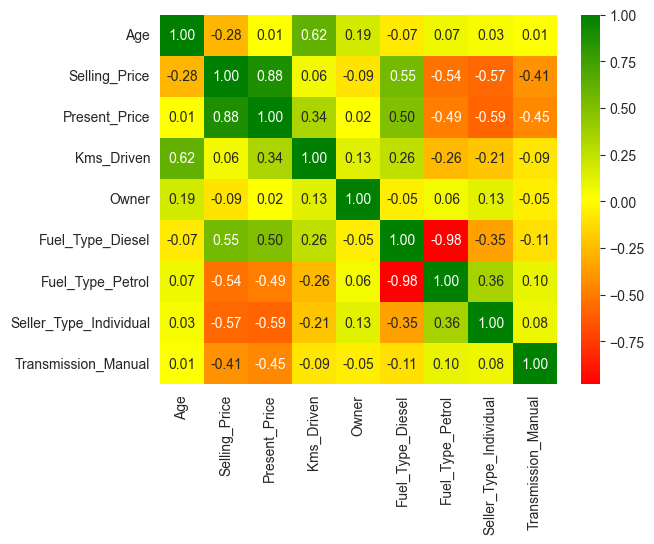

In [323]:
import matplotlib.colors as mcolors
target = 'Selling_Price'
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap=cmap)

- __TARGET variable 'Selling_Price' is HIGY correlated with Selling Price and mildy corelated with Seller_Type_Individual and both Fuel_Type__
- __Multicollinearity observed between pertol and diesel which proves one can represent other in the dataset__

In [324]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [326]:
y_test_actual = y_test

In [327]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [328]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [329]:
linear_reg.intercept_

4.302488038277512

In [330]:
linear_reg.coef_

array([-0.93633891,  3.49272939, -0.58967211, -0.23272244,  0.85021699,
        0.20731905, -0.37733404,  0.0273749 ])

In [331]:
eqn = pd.DataFrame(data = np.append(linear_reg.intercept_,linear_reg.coef_),
                   index=['intercept']+[col+'coef.'for col in X.columns],
                   columns=['values']).sort_values('values',ascending=False)
eqn

,values
intercept,4.302488
Present_Pricecoef.,3.492729
Fuel_Type_Dieselcoef.,0.850217
Fuel_Type_Petrolcoef.,0.207319
Transmission_Manualcoef.,0.027375
Ownercoef.,-0.232722
Seller_Type_Individualcoef.,-0.377334
Kms_Drivencoef.,-0.589672
Agecoef.,-0.936339


- __Anything above 0.1 or -0.1 has impact on the target variable__
- __Here Mannual transmission is 0.02 which indicates very less impact__

In [332]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [333]:
model_evaluation(linear_reg,X_test_scaled,y_test,model_name='linear_reg')

,linear_reg
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


In [334]:
# kfold cross val
def cross_val(X,y):
    pipeline = make_pipeline(StandardScaler(),  LinearRegression())

    k_fold = KFold(n_splits=6, shuffle=True, random_state=0) 
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=k_fold, return_train_score=True, scoring=scoring)
    # type(result)

    cv_df = pd.DataFrame(result)
    cv_df1 = cv_df.drop(['fit_time','score_time'],axis=1)
    summary = cv_df1.describe(percentiles=[])
    return summary.transpose()

In [335]:
cross_val(X,y)

,count,mean,std,min,50%,max
test_neg_mean_absolute_error,6.0,-1.154774,0.161444,-1.341422,-1.126652,-0.999302
train_neg_mean_absolute_error,6.0,-1.065864,0.048425,-1.125608,-1.066102,-1.015282
test_neg_mean_squared_error,6.0,-3.131755,1.439764,-4.972117,-3.069613,-1.552322
train_neg_mean_squared_error,6.0,-2.460814,0.237289,-2.736657,-2.499714,-2.146922
test_neg_root_mean_squared_error,6.0,-1.728702,0.414745,-2.229824,-1.727540,-1.245922
train_neg_root_mean_squared_error,6.0,-1.567162,0.076034,-1.654284,-1.580551,-1.465238
test_r2,6.0,0.855703,0.036939,0.794406,0.855179,0.908589
train_r2,6.0,0.891750,0.004973,0.884779,0.891353,0.898329


- __R-2 score for test is 85.57 and test is 89% no such overfitting observed but when i used random state as 42 ouputs were increased__

# Check For Assumptions
1. __linear__ 
    - __realtionship between independant and dependant variable should be linear__
2. __Normlaity__
    - __The residuals should be normally distributed.__
    - __anderson darling test(unknown mean and variance)__  
4. __No multicollinearity__
    - __The independent variables should not be highly correlated with each other.__
    - __check Variance Inflation Factor (VIF)__
    - __heatmap__
5. __No auto-correlation__
   - __The residuals should not be auto-correlated.__
   - __use durbin watson test__
6. __Homoscedasticity__
    - __The variance of the residuals should be constant across all levels of the independent variables.__
    - __residual plots, Breusch-Pagan test__
7. __Independance__
    - __each observation should be independant of other__ 
    - __use durbin watson test__ 

# __Check for Linearity__

In [336]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [337]:
def check_linear(model, X_test, y_test):
    try:
        df_results = residuals(model, X_test, y_test)
        _,ax = plt.subplots(1, 3, figsize=(15, 6), dpi=80)

        sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                     color='#0055ff', line_kws={'color': '#ff7000', 'ls': '--', 'lw': 2.5})
        ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
        sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                     color='#0055ff', line_kws={'color': '#ff7000', 'ls': '--', 'lw': 2.5})
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
        sns.residplot(data=df_results, x="Predicted", y="Residuals",lowess=True,
                       line_kws=dict(color="#ff7000",ls= '--'),ax=ax[2])
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")

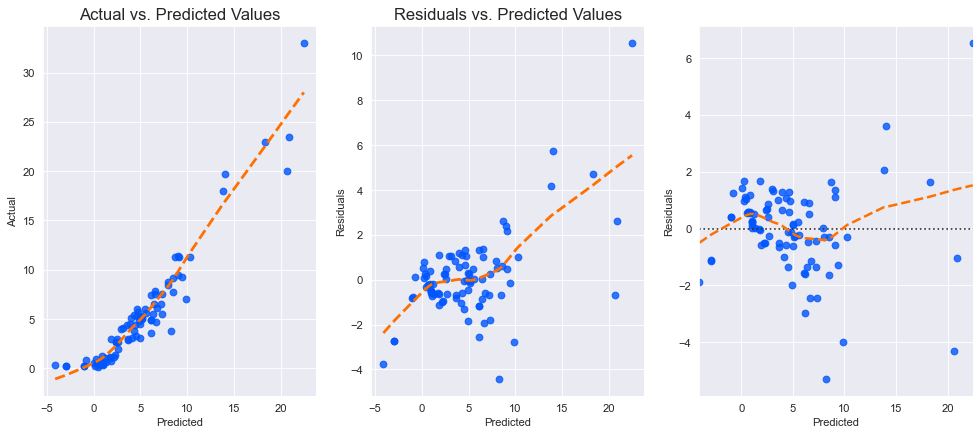

In [338]:
check_linear(linear_reg, X_test_scaled, y_test)

# data is non linear 
- reasons can be 
    - large outliers
    - non normal distribution of varibale
- impact
    - if the error terms are not normally distributed it causes the confidence interval to shrink or expand wide.
- investigation to do list
    - check residuals histogram
    - residuals Q-Q plot
    - anderson darling test 

# __Normality in residuals__

In [339]:
def check_normal_error(model, X_test, y_test, p_value_thresh=0.05):
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    stats ,p_value = normal_ad(df_results['Residuals'])

    if p_value > p_value_thresh:
        print(f'P values:{p_value:.4f}>0.05 Residuals are normally distributed. Assumption satisfied.')
         
    else:
        print(f'P values:{p_value:.4f}<0.05 Residuals are not normally distributed. Assumption not satisfied.')
    
    _, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    
    scipy_stats.probplot(df_results['Residuals'], dist="norm", plot=ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)

P values:0.0000<0.05 Residuals are not normally distributed. Assumption not satisfied.


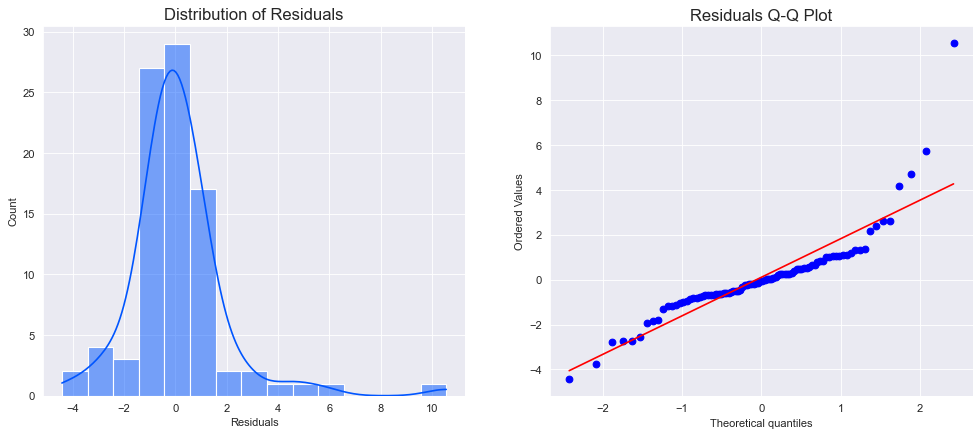

In [340]:
check_normal_error(linear_reg, X_test_scaled, y_test)

- __observation__
    - __points at the extreme of the Q-Q plot deviate significantly from the straight line.The points bend upward from the diagonal on the right side.Indicates long right tail (large positive residuals).__
    - __Leptokurtic (High Kurtosis, Heavy Tails):The points bulge away from the diagonal at both ends but hug the line in the middle.Indicates more outliers (thicker tails).__
    - __residuals donot follow gausian distribution__




- __Solution__
    - 

# __No multicollinearity__

__consider heatmap observations__

### A vif of above 5 can be entertained but above 10 is eliminated

In [341]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_mutlicollinearity(X):
    '''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    # Ensure all columns are numerical
    booleans= X.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
    for col in booleans:
        X[col] = X[col].map({True: 1, False: 0})
    # Check for duplicate column names
    if len(X.columns) != len(set(X.columns)):
        raise ValueError("Duplicate column names detected.")
    
    # Check for constant columns
    if (X.std() == 0).any():
        raise ValueError("Constant columns detected.")
    
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [342]:
check_mutlicollinearity(X)

1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Age,8.15
Present_Price,5.14
Kms_Driven,5.34
Owner,1.10
Fuel_Type_Diesel,6.11
Fuel_Type_Petrol,16.86
Seller_Type_Individual,2.61
Transmission_Manual,9.59


__multicollinearity for Fuel_Type_Petrol.__

# __No AutoCorrelation__

__This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.__

### Interpretation of the Durbin-Watson test statistic:
__dw ~ 2: indicates no autocorrelation__\
__dw < 1.5: indicates positive autocorrelation__\
__dw > 2.5: indicates negative autocorrelation__

In [343]:
def check_autocorrelation(model,X_test,y_test):
    
    df_results = residuals(model, X_test, y_test)
    dw = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(dw,3))
    if dw < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif dw > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [344]:
check_autocorrelation(linear_reg, X_test_scaled, y_test)

Durbin-Watson: 1.823
Little to no autocorrelation. Assumption satisfied. 



- __durbin watson test proves no autocorrelation__

# __Homoscedasticity__

In [345]:
def check_homoscedasticity(model, X_test, y_test):
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results,ax=ax[0], 
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].axhline(y=0, color='#23bf00', lw=1)
    ax[0].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted Values', fontsize=12)
    ax[0].set_ylabel('Residuals', fontsize=12)   

    sns.residplot(data=df_results, x="Predicted", y="Residuals",lowess=True, line_kws=dict(color="r"),ax=ax[1])
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)

    plt.show()

The orange line should be flat:


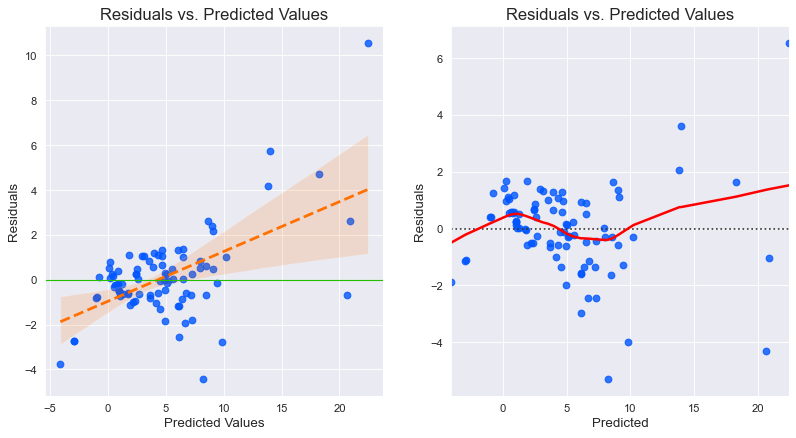

In [346]:
check_homoscedasticity(linear_reg, X_test_scaled, y_test)

__We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.__

__Potential solutions:__
* __Outlier removal__
* __Appllying log transformation of independent variables__
* __Applying polynomial regression__

### In the following:
* __To satisfy the multicollinearity assumption, we remove the Fuel_Type_Petrol feature.__
* __Then, according to the pattern in the plot of the residuals vs. predicted values, we will use box-cox transformation on the entire dataset.__ 
* __By applying polynomial regression, we will try to improve the satisfaction of homoscedasticity and normality of residuals.__
* __Finally, we will use regularization to reduce the probability of the model to be overfit.__

In [347]:
del df1['Fuel_Type_Petrol']

In [348]:
y_test_actual = y_test
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [349]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

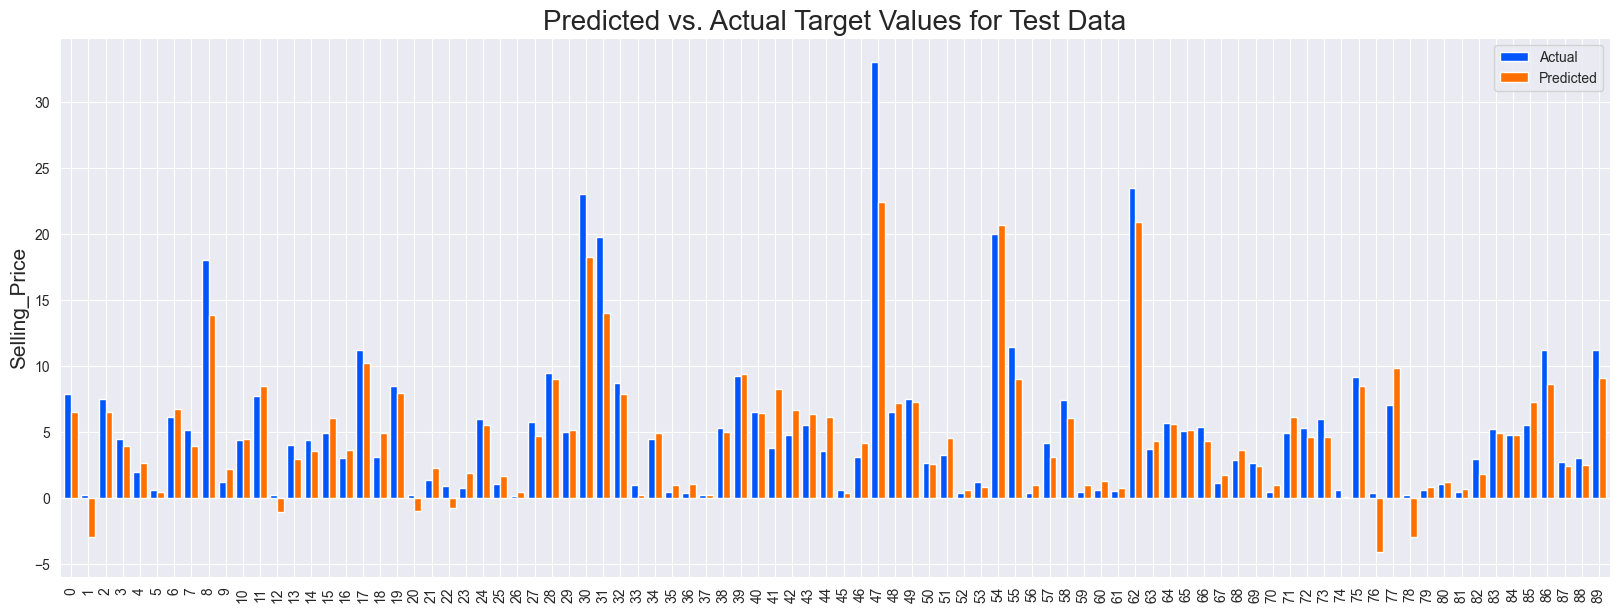

In [350]:
compare_plot(df_comp)

__Selling_Price has been predicted negatively in 6 cases. A negative prediction for Selling_Price is disappointing.__

In [351]:
fitted_lambda = pd.Series(np.zeros(len(df1.columns), dtype=np.float64), index=df1.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1) # +1 to avoid log of 0 
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
fitted_lambda

Age                       -0.360231
Selling_Price             -0.035121
Present_Price              0.078725
Kms_Driven                 0.350131
Owner                    -30.152326
Fuel_Type_Diesel          -7.293622
Seller_Type_Individual    -2.570020
Transmission_Manual       14.351418
Fuel_Type_Petrol           6.887121
dtype: float64

In [ ]:
import pickle
file_path = "E:\\python\\2.PROJECTS\\car sales prediction\\artifacts\\fitted_lambda.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(fitted_lambda, f)

In [352]:
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [353]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

del df_boxcox['Fuel_Type_Petrol']

In [354]:
df_boxcox.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,1.320187,2.032688,98.846621,0.0,0.000000,0.0,1456.437063,1.432865
1,1.398824,2.587658,116.843735,0.0,0.136232,0.0,1456.437063,1.696554
2,0.907273,2.622591,60.223854,0.0,0.000000,0.0,1456.437063,2.033913
3,1.518024,1.749435,54.276830,0.0,0.000000,0.0,1456.437063,1.316658
4,1.320187,2.240043,116.305438,0.0,0.136232,0.0,1456.437063,1.671684


__in EDA we saw all variables are positively skewed__

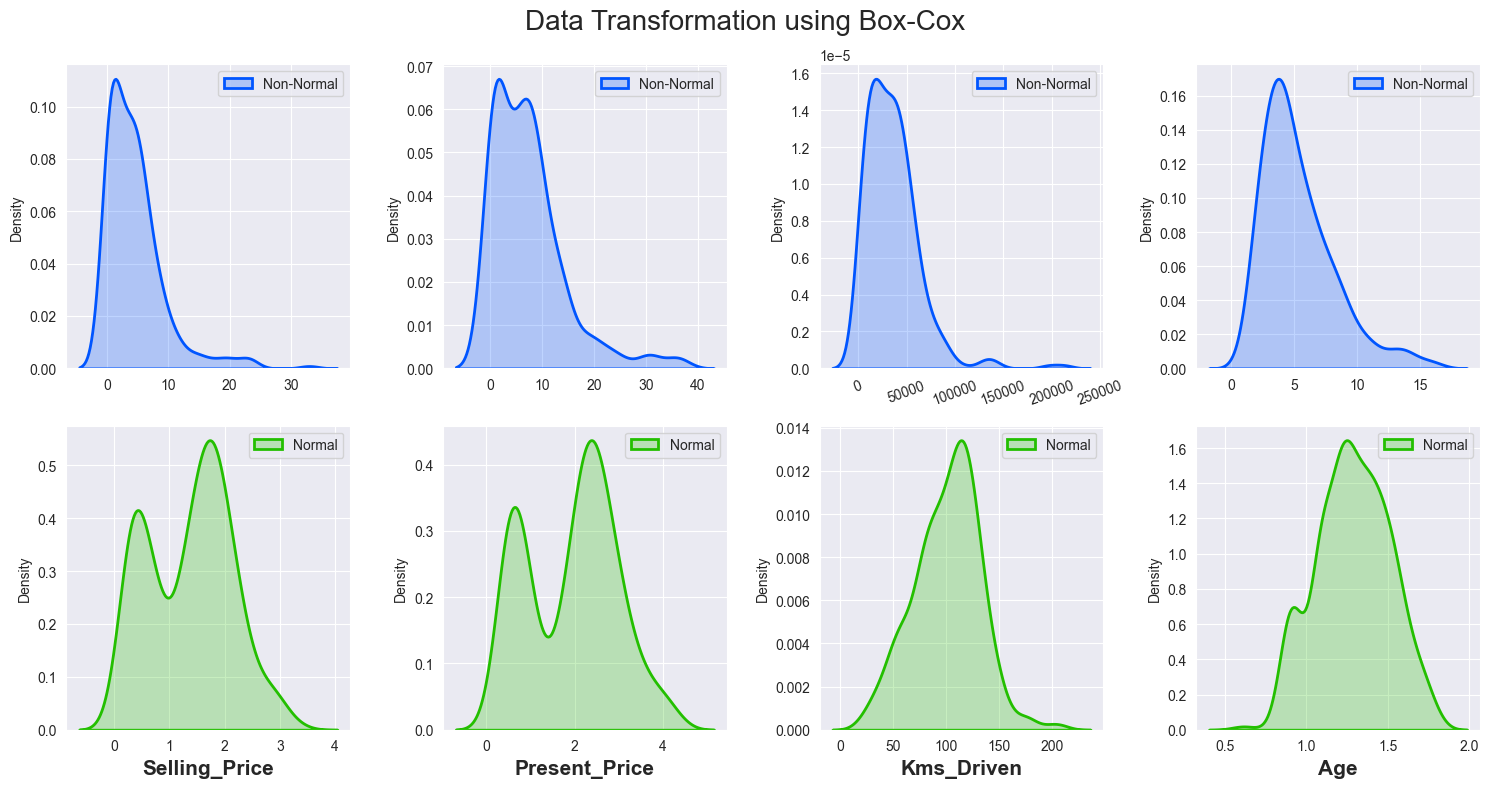

In [355]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i,col in enumerate(columns):
    sns.kdeplot(df1[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

__now distribution is closer to normal distribuion after applying boxcox__

# __2nd order Polynomial Features__

In [356]:
X = df_boxcox.drop('Selling_Price', axis=1)
y = df_boxcox['Selling_Price']

In [357]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,1.320187,2.032688,98.846621,0.0,0.000000,0.0,1456.437063,1.742893,2.683528,130.496003,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121209e+06
1,1.398824,2.587658,116.843735,0.0,0.136232,0.0,1456.437063,1.956709,3.619679,163.443843,...,0.0,0.0,0.0,0.0,0.018559,0.0,198.413629,0.0,0.0,2.121209e+06
2,0.907273,2.622591,60.223854,0.0,0.000000,0.0,1456.437063,0.823145,2.379406,54.639485,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121209e+06
3,1.518024,1.749435,54.276830,0.0,0.000000,0.0,1456.437063,2.304398,2.655684,82.393551,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.121209e+06
4,1.320187,2.240043,116.305438,0.0,0.136232,0.0,1456.437063,1.742893,2.957275,153.544903,...,0.0,0.0,0.0,0.0,0.018559,0.0,198.413629,0.0,0.0,2.121209e+06


In [358]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

In [359]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [360]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [361]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

In [362]:
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

,Polynomial Reg. Test
MAE,0.088163
MSE,0.011432
RMSE,0.106920
R2-Score,0.981584


In [363]:
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')

,Polynomial Reg. Train
MAE,0.064327
MSE,0.006435
RMSE,0.080222
R2-Score,0.988170


In [364]:
def cross_val_w_poly(X,y):
    pipeline = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),  LinearRegression())

    k_fold = KFold(n_splits=6, shuffle=True, random_state=0) 
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=k_fold, return_train_score=True, scoring=scoring)
    # type(result)

    cv_df = pd.DataFrame(result)
    cv_df1 = cv_df.drop(['fit_time','score_time'],axis=1)
    summary = cv_df1.describe(percentiles=[])
    return summary.transpose()

In [365]:
cross_val_w_poly(X,y)

,count,mean,std,min,50%,max
test_neg_mean_absolute_error,6.0,-0.079857,0.010586,-0.090350,-0.083038,-0.060620
train_neg_mean_absolute_error,6.0,-0.067596,0.002087,-0.070658,-0.067194,-0.064589
test_neg_mean_squared_error,6.0,-0.011984,0.006174,-0.023876,-0.010796,-0.005668
train_neg_mean_squared_error,6.0,-0.007225,0.000372,-0.007754,-0.007148,-0.006805
test_neg_root_mean_squared_error,6.0,-0.106877,0.025953,-0.154519,-0.103892,-0.075287
train_neg_root_mean_squared_error,6.0,-0.084976,0.002182,-0.088055,-0.084548,-0.082494
test_r2,6.0,0.978172,0.011895,0.955342,0.982111,0.989120
train_r2,6.0,0.987291,0.000682,0.986378,0.987329,0.988413


# __check all assumption__

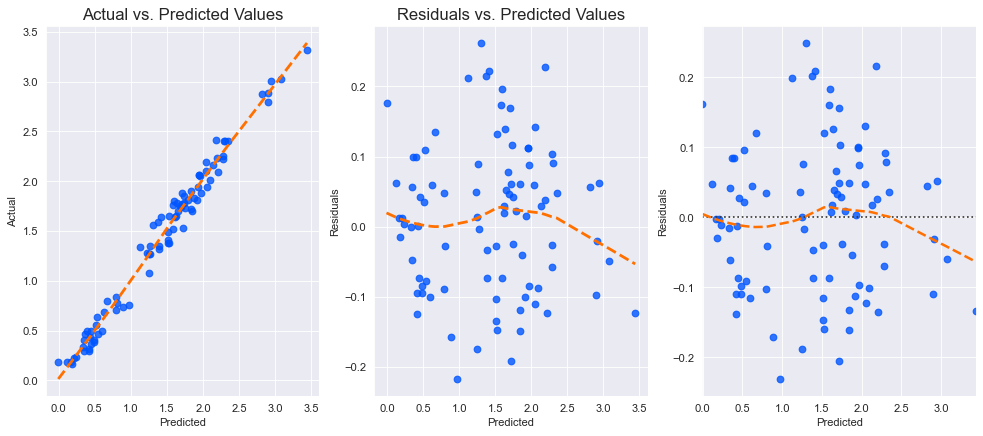

In [366]:
check_linear(polynomial_reg, X_poly_test, y_poly_test)

P values:0.4508>0.05 Residuals are normally distributed. Assumption satisfied.


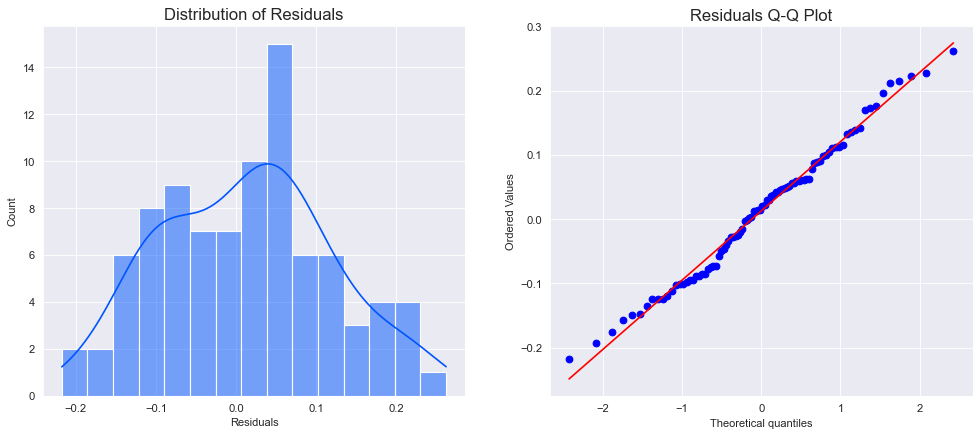

In [367]:
check_normal_error(polynomial_reg, X_poly_test, y_poly_test)

In [369]:
check_mutlicollinearity(X_poly).T

e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,5900.61,1600.38,2718.65,inf,inf,inf,inf,2291.33,1982.97,2095.33,...,inf,2.91,22.29,194.47,inf,5.69,40.17,inf,139.2,inf


In [370]:
check_autocorrelation(polynomial_reg, X_poly_test, y_poly_test)

Durbin-Watson: 1.836
Little to no autocorrelation. Assumption satisfied. 



The orange line should be flat:


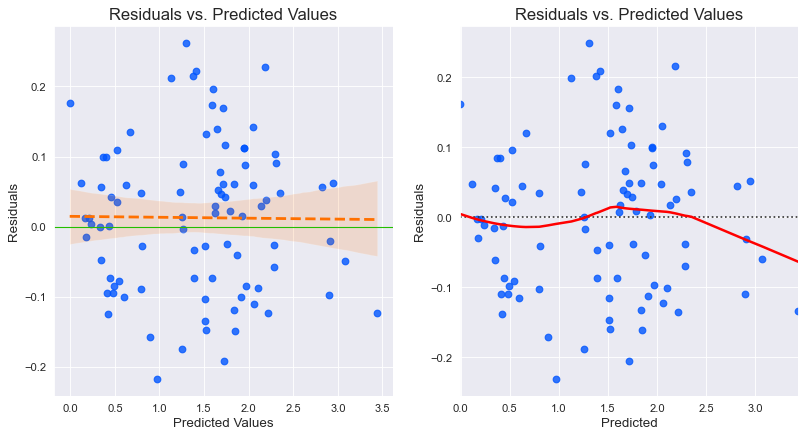

In [371]:
check_homoscedasticity(polynomial_reg, X_poly_test, y_poly_test)

__multicolinearity results are not good__

# solution
- use elastic net cv
- drop high vif features


In [381]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Fuel_Type_Diesel^2 Transmission_Manual^2,Fuel_Type_Diesel Seller_Type_Individual^3,Fuel_Type_Diesel Seller_Type_Individual^2 Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual Transmission_Manual^2,Fuel_Type_Diesel Transmission_Manual^3,Seller_Type_Individual^4,Seller_Type_Individual^3 Transmission_Manual,Seller_Type_Individual^2 Transmission_Manual^2,Seller_Type_Individual Transmission_Manual^3,Transmission_Manual^4
0,1.320187,2.032688,98.846621,0.0,0.000000,0.0,1456.437063,1.742893,2.683528,130.496003,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499527e+12
1,1.398824,2.587658,116.843735,0.0,0.136232,0.0,1456.437063,1.956709,3.619679,163.443843,...,39367.968189,0.0,0.0,0.0,4.208768e+08,0.0,0.0,0.0,0.0,4.499527e+12
2,0.907273,2.622591,60.223854,0.0,0.000000,0.0,1456.437063,0.823145,2.379406,54.639485,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499527e+12
3,1.518024,1.749435,54.276830,0.0,0.000000,0.0,1456.437063,2.304398,2.655684,82.393551,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,4.499527e+12
4,1.320187,2.240043,116.305438,0.0,0.136232,0.0,1456.437063,1.742893,2.957275,153.544903,...,39367.968189,0.0,0.0,0.0,4.208768e+08,0.0,0.0,0.0,0.0,4.499527e+12


In [382]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [383]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [384]:
final_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=4, max_iter=100000)

In [385]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

In [386]:
final_model.l1_ratio_

1.0

In [387]:
final_model.alpha_

0.0006881979610341839

In [388]:
model_evaluation(final_model, X_test, y_test, 'Final Model. Test')

,Final Model. Test
MAE,0.083486
MSE,0.010573
RMSE,0.102825
R2-Score,0.982967


In [389]:
model_evaluation(final_model, X_train, y_train, 'Final Model. Train')

,Final Model. Train
MAE,0.061915
MSE,0.006108
RMSE,0.078152
R2-Score,0.988773


In [390]:
final_model.coef_

array([ 0.00000000e+00,  8.56797730e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.47251116e-02, -1.61521679e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.58069653e-04, -0.00000000e+00,
       -1.01119924e-02, -0.00000000e+00, -1.63371017e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [391]:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef.T

,Present_Price,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2,Transmission_Manual^2,Age Fuel_Type_Diesel Seller_Type_Individual,Age Seller_Type_Individual Transmission_Manual,Present_Price Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual,...,Present_Price Kms_Driven^2 Fuel_Type_Diesel,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual,Kms_Driven^2 Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven^2 Fuel_Type_Diesel Transmission_Manual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual^2,Fuel_Type_Diesel^3 Seller_Type_Individual,Seller_Type_Individual^4
Final Model Coef.,0.856798,-0.014725,-0.000162,0.000258,-0.010112,-0.000163,0.000444,-0.007739,0.00001,9.296126e-18,...,0.030016,-0.000346,-0.026744,0.017305,0.011389,0.002448,-0.000069,0.000001,6.871165e-16,-0.024869


In [392]:
X_poly_final = X_poly[final_coef.index]
multicollinearity_assumption(X_poly_final).T

e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


35 cases of possible multicollinearity.
29 cases of definite multicollinearity.
Assumption not satisfied.


,Present_Price,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2,Transmission_Manual^2,Age Fuel_Type_Diesel Seller_Type_Individual,Age Seller_Type_Individual Transmission_Manual,Present_Price Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual,...,Present_Price Kms_Driven^2 Fuel_Type_Diesel,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual,Kms_Driven^2 Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven^2 Fuel_Type_Diesel Transmission_Manual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual^2,Fuel_Type_Diesel^3 Seller_Type_Individual,Seller_Type_Individual^4
vif,35.35,4.503600e+15,inf,inf,1.277535e+10,inf,inf,21.28,inf,inf,...,2588.69,4.01,2.27,618.98,20.06,5.004000e+14,220.76,inf,inf,6.287748e+10


__drop high vif features__

In [393]:
def vif_calculator(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [394]:
for i in range(X_poly_final.shape[0]):
    df_vif = vif_calculator(X_poly_final)[::-1]
    df_vif.reset_index(inplace=True)
    if df_vif['vif'].max() > 99:
        idx = df_vif['vif'].argmax()
        col = df_vif.iloc[idx]['index']
        X_poly_final.drop(col, axis=1, inplace=True)

e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ACER\AppData\Local\Temp\ipykernel_14456\2146711514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_poly_final.drop(col, axis=1, inplace=True)
e:\python\2.PROJECTS\car sales prediction\carVENV\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ACER\AppData\Local\Temp\ipykernel_14456\2146711514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [395]:
multicollinearity_assumption(X_poly_final).T

12 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,Present_Price,Transmission_Manual,Seller_Type_Individual^2,Age Seller_Type_Individual Transmission_Manual,Kms_Driven Fuel_Type_Diesel Transmission_Manual,Age^4,Age^2 Present_Price^2,Age^2 Owner Transmission_Manual,Age^2 Fuel_Type_Diesel Seller_Type_Individual,Age^2 Fuel_Type_Diesel Transmission_Manual,Age Present_Price^2 Fuel_Type_Diesel,Age Kms_Driven^2 Seller_Type_Individual,Present_Price^4,Present_Price^2 Fuel_Type_Diesel Transmission_Manual,Present_Price^2 Seller_Type_Individual Transmission_Manual,Present_Price Kms_Driven^2 Owner,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual
vif,33.32,21.02,10.28,20.04,75.84,12.21,33.11,4.79,2.48,41.17,16.44,9.42,29.28,19.48,2.02,3.03,3.48,2.26,13.26,9.88


In [ ]:
final_columns = X_poly_final.columns
final_columns 

In [ ]:
import pickle
file_path = "E:\\python\\2.PROJECTS\\car sales prediction\\artifacts\\final_columns.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(final_columns, f)

# rebuilding the final model on new feature

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_final, y, test_size=0.3, random_state=0)

In [397]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle
file_path = "E:\\python\\2.PROJECTS\\car sales prediction\\artifacts\\standard_scaler.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(scaler, f)

In [398]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1], 
                                 eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [403]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

In [ ]:
import pickle
file_path = "E:\\python\\2.PROJECTS\\car sales prediction\\artifacts\\elastic_poly_reg.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(final_model, f)

In [404]:
final_model.l1_ratio_

1.0

In [405]:
final_model.alpha_

0.00277826704602596

In [406]:
model_scores = model_evaluation(final_model, X_test, y_test, 'Final Model. Test')
model_scores

,Final Model. Test
MAE,0.093877
MSE,0.012354
RMSE,0.111151
R2-Score,0.980098


In [407]:
model_evaluation(final_model, X_train, y_train, 'Final Model. Test')

,Final Model. Test
MAE,0.068449
MSE,0.007699
RMSE,0.087744
R2-Score,0.985848


In [408]:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly_final.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef

,Final Model Coef.
Present_Price,0.865916
Transmission_Manual,0.011434
Seller_Type_Individual^2,-0.026346
Age^4,-0.107965
Age^2 Present_Price^2,-0.263485
Age^2 Owner Transmission_Manual,0.008020
Age Present_Price^2 Fuel_Type_Diesel,0.081971
Age Kms_Driven^2 Seller_Type_Individual,0.008965
Present_Price Kms_Driven^2 Owner,-0.019951
Present_Price Owner Seller_Type_Individual Transmission_Manual,-0.020530


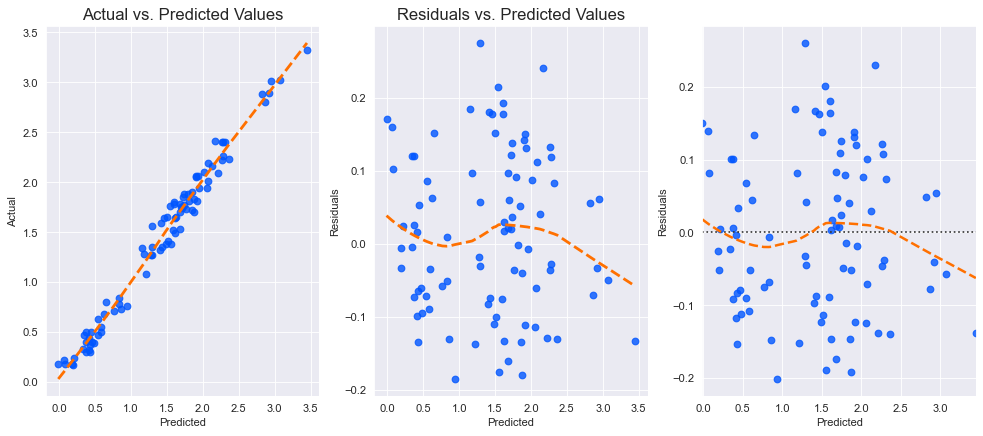

In [409]:
check_linear(final_model, X_test, y_test)

P values:0.0854>0.05 Residuals are normally distributed. Assumption satisfied.


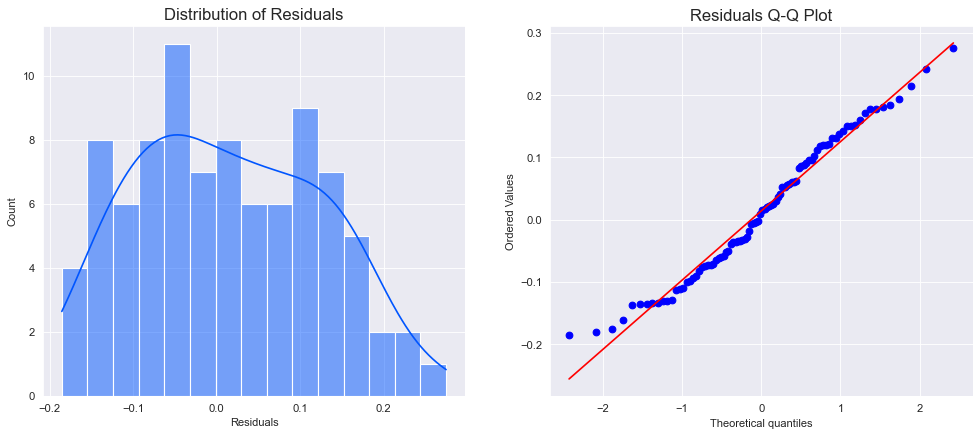

In [410]:
check_normal_error(final_model, X_test, y_test)

In [411]:
X_poly_final = X_poly[final_coef.index]
check_mutlicollinearity(X_poly_final)

3 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Present_Price,18.47
Transmission_Manual,11.99
Seller_Type_Individual^2,4.95
Age^4,7.54
Age^2 Present_Price^2,15.72
Age^2 Owner Transmission_Manual,2.31
Age Present_Price^2 Fuel_Type_Diesel,2.10
Age Kms_Driven^2 Seller_Type_Individual,4.07
Present_Price Kms_Driven^2 Owner,1.59
Present_Price Owner Seller_Type_Individual Transmission_Manual,1.97


In [413]:
check_autocorrelation(final_model, X_test, y_test)

Durbin-Watson: 1.699
Little to no autocorrelation. Assumption satisfied. 



The orange line should be flat:


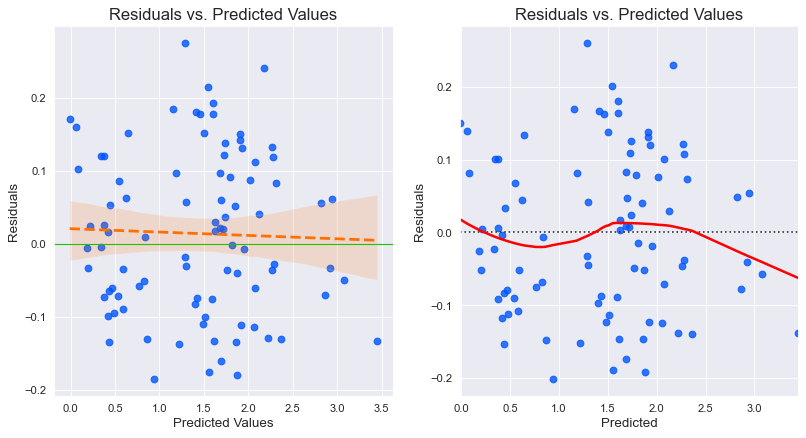

In [414]:
check_homoscedasticity(final_model, X_test, y_test)

In [415]:
y_test_pred = final_model.predict(X_test)
y_test_pred = inv_boxcox(y_test_pred, fitted_lambda['Selling_Price']) - 1

In [416]:
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

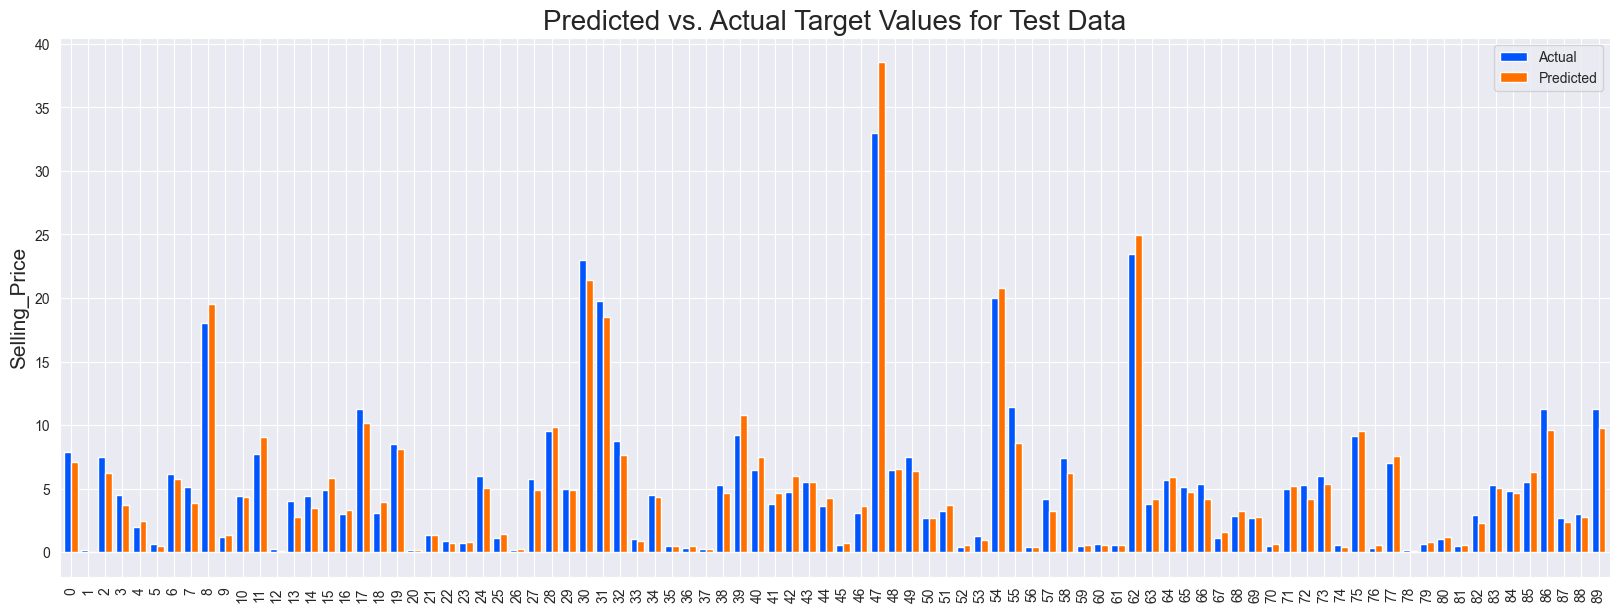

In [417]:
compare_plot(df_comp)

In [418]:
final_coef.reset_index().replace(' ',' . ', regex=True).set_index('index')

,Final Model Coef.
index,
Present_Price,0.865916
Transmission_Manual,0.011434
Seller_Type_Individual^2,-0.026346
Age^4,-0.107965
Age^2 . Present_Price^2,-0.263485
Age^2 . Owner . Transmission_Manual,0.008020
Age . Present_Price^2 . Fuel_Type_Diesel,0.081971
Age . Kms_Driven^2 . Seller_Type_Individual,0.008965
Present_Price . Kms_Driven^2 . Owner,-0.019951


In [419]:
model_scores

,Final Model. Test
MAE,0.093877
MSE,0.012354
RMSE,0.111151
R2-Score,0.980098


# __4th order polynomial regression__